In [1]:
import sys
from pathlib import Path

# El path absoluto al directorio 'src' (donde está 'songrecommender')
project_root = Path().resolve().parents[0]  # carpeta TP_CIENCIA_DE_DATOS
src_path = project_root / 'src'
sys.path.insert(0, str(src_path))

print(f"Path actual: {Path().resolve()}")
print(f"Project root: {project_root}")
print(f"src path agregado a sys.path: {src_path}")

from songrecommender.recommender.model import SongRecommender

Path actual: E:\CDD1\TP_Ciencia_De_Datos\notebooks
Project root: E:\CDD1\TP_Ciencia_De_Datos
src path agregado a sys.path: E:\CDD1\TP_Ciencia_De_Datos\src


In [3]:

# Crear instancia con ruta correcta a parquet
recommender = SongRecommender(
    data_path=str(project_root / 'data' / 'processed' / 'million_song_combined.parquet'),
    n_neighbors=10,
    use_pca=False,
    pca_n_components=0.9,
    exclude_same_artist=True
)

print("Modelo cargado!")

# Ejemplo para listar géneros
genres = recommender.df['genre'].unique()
print(f"Géneros disponibles ({len(genres)}):\n", genres)





INFO:songrecommender.recommender.model:🟦 Inicializando SongRecommender...
DEBUG:songrecommender.recommender.model:📁 Ruta del archivo parquet: E:\CDD1\TP_Ciencia_De_Datos\data\processed\million_song_combined.parquet
INFO:songrecommender.recommender.model:📦 Cargando datos desde: E:\CDD1\TP_Ciencia_De_Datos\data\processed\million_song_combined.parquet
DEBUG:songrecommender.recommender.model:📊 Dataset cargado con 9711301 canciones (antes de eliminar duplicados)
DEBUG:songrecommender.recommender.model:🎯 Dataset limpio con 30459 canciones únicas
INFO:songrecommender.recommender.model:✅ Todas las columnas necesarias están presentes.
DEBUG:songrecommender.recommender.model:🔍 Entrenando modelo NearestNeighbors
INFO:songrecommender.recommender.model:✅ Modelo KNN entrenado con éxito.


Modelo cargado!
Géneros disponibles (16):
 ['rnb' 'pop' '' 'rock' 'electronic' 'world' 'rap' 'metal' 'folk' 'country'
 'reggae' 'jazz' 'latin' 'punk' 'new age' 'blues']


In [4]:
# Celda 4: Recomendaciones por álbum y artista
try:
    track = "pepas"
    artist = "farruko"
    print(f"Recomendaciones para el álbum '{track}' de '{artist}':\n")
    recs = recommender.recommend_songs(track, artist, n_recommendations=5)
    display(recs)
except ValueError as e:
    print(e)


INFO:songrecommender.recommender.model:🔎 Buscando canción: 'pepas' de 'farruko'
DEBUG:songrecommender.recommender.model:🧪 Normalizados: artista='farruko', canción='pepas'
DEBUG:songrecommender.recommender.model:🔍 Matches encontrados: 0
ERROR:songrecommender.recommender.model:❌ No se encontró en dataset: farruko - pepas


Recomendaciones para el álbum 'pepas' de 'farruko':

No se encontró en dataset: farruko - pepas


DEBUG:matplotlib:matplotlib data path: e:\CDD1\TP_Ciencia_De_Datos\.venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\lanci\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\lanci\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\lanci\.matplotlib\fontlist-v390.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='e:\\CDD1\\TP_Ciencia_De_Datos\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scala

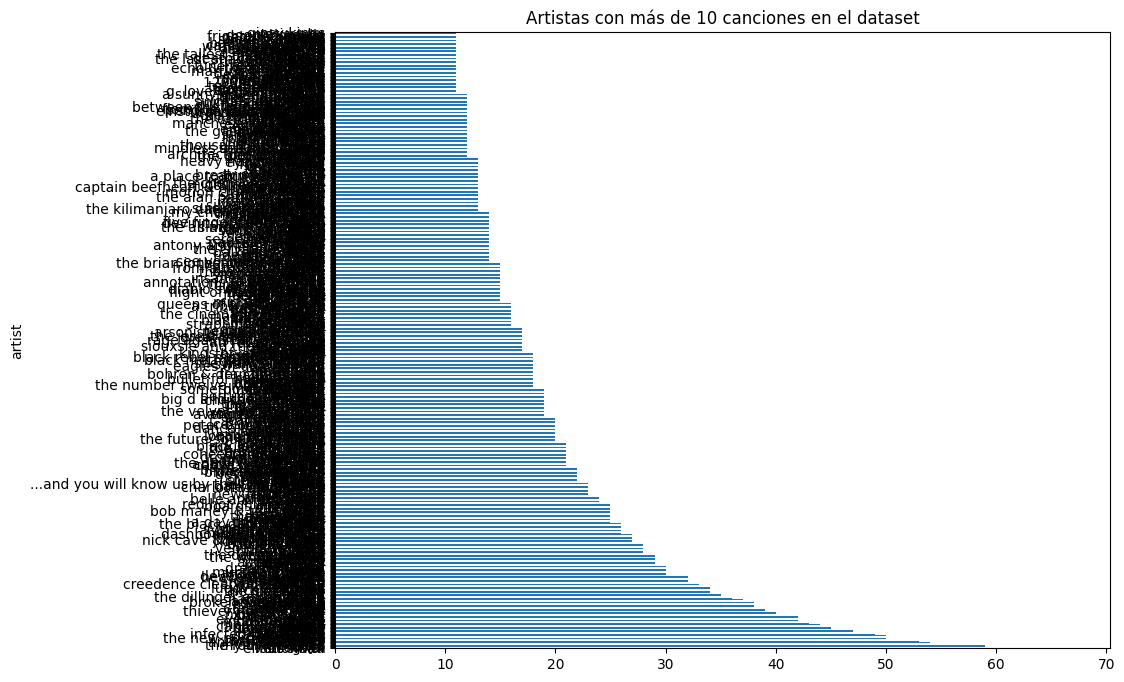

In [5]:
import matplotlib.pyplot as plt

# Ver cuántas canciones tiene cada artista
artist_counts = recommender.df['artist'].value_counts()
artist_counts[artist_counts > 10].plot(kind='barh', figsize=(10, 8))
plt.title("Artistas con más de 10 canciones en el dataset")
plt.show()


In [7]:

# Celda 5: Recomendaciones por género
genre = "pop"
print(f"Top canciones para género '{genre}':\n")
top_songs = recommender.df[recommender.df['genre'] == genre].head(10)
display(top_songs)

Top canciones para género 'pop':



,track_id,name,artist,genre,duration_ms,danceability,energy,loudness,speechiness,valence,tempo
1,TRFUPBA128F934F7E1,paper gangsta,lady gaga,pop,260000,0.823,0.530,-9.344,0.0579,0.800,100.002
72,TRCKWGF12903CD2DCD,never let you go,third eye blind,pop,237120,0.729,0.940,-4.933,0.0382,0.966,113.804
119,TRRSCIC128F92CC95B,lovebug,jonas brothers,pop,220693,0.597,0.499,-6.216,0.0581,0.521,79.071
229,TRWZFIC128F933BCA3,in person,the pussycat dolls,pop,215666,0.614,0.905,-4.337,0.4060,0.684,201.871
298,TROUMHD128F9355B89,obsessions,marina & the diamonds,pop,208133,0.721,0.616,-6.795,0.0343,0.521,104.955
337,TRMRHPL128F42890D1,not falling apart,maroon 5,pop,243626,0.758,0.714,-5.027,0.0382,0.403,119.971
341,TRPHFNB128F93141E7,electric feel,mgmt,pop,229173,0.780,0.797,-5.474,0.0340,0.654,103.028
390,TRUFTBY128F93450B8,alejandro,lady gaga,pop,274800,0.626,0.800,-6.777,0.0435,0.353,98.995
392,TRIOJTX128F932DDA1,chinese,lily allen,pop,208213,0.541,0.925,-6.585,0.0843,0.357,143.011
399,TRGCHLH12903CB7352,party in the u.s.a.,the barden bellas,pop,63080,0.531,0.360,-8.575,0.1080,0.701,97.200
